<a href="https://colab.research.google.com/github/ianbernardino/Quantitative-Finance-Models/blob/master/CAPM_BANKING_9M20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAPM MODEL: AN APPROACH TO A BANKING PORTFOLIO**

We'll work delivering various performance metrics for the Banking stocks present in IBOVESPA from 2016-01-01 until 2020-11-06:
ABCB4.SA, BBAS3.SA, BBDC4.SA, SANB11.SA,  BRSR6.SA, ITUB4.SA, , BPAN4.SA, 

The following stocks present not enough historical data, so they are left out of the study:
BMGB4.SA, BIDI4.SA, BPAC11.SA,


Lets create the evaluated optimal Banking Portfolio (MP) for these stocks based on historical data of the returns and compare to the optimal portfolio performance and Market Portfolio performance of BOVESPA index.

However the optimal portfolio cannot be seen as the average portfolio of commom investors so it is necessary take BOVESPA as the benchmark and figure it out what stocks outperformed the market average.



In [76]:
import pandas as pd
pd.options.display.float_format = '${:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import seaborn as sns

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


## DATABASE

In [77]:
tickers = ["ABCB4.SA", "BBAS3.SA", "BBDC4.SA", "SANB11.SA", "BRSR6.SA", "ITUB4.SA", "BPAN4.SA"]
Market_Portfolio = ["^BVSP"]
stocks = yf.download(tickers, start = "2016-01-01")
MP = yf.download(Market_Portfolio, start = "2016-01-01")

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
stocks.tail()

Adj Close           ...         Volume              
            ABCB4.SA BBAS3.SA  ...       ITUB4.SA     SANB11.SA
Date                           ...                             
2020-10-30    $12.20   $29.80  ... $39,190,000.00 $2,974,700.00
2020-11-03    $12.70   $30.10  ... $37,440,300.00 $2,881,500.00
2020-11-04    $12.61   $30.32  ... $96,994,100.00 $2,821,300.00
2020-11-05    $12.77   $30.69  ... $44,134,800.00 $3,434,200.00
2020-11-06    $12.84   $30.49  ... $31,827,000.00 $2,192,300.00

[5 rows x 60 columns]

In [78]:
MP.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-30,"$96,579.00","$96,579.00","$93,559.00","$93,952.00","$93,952.00",10643200
2020-11-03,"$93,968.00","$96,250.00","$93,968.00","$95,587.00","$95,587.00",10191800
2020-11-04,"$95,992.00","$98,296.00","$95,987.00","$97,811.00","$97,811.00",10704600
2020-11-05,"$97,873.00","$100,922.00","$97,872.00","$100,774.00","$100,774.00",10455300
2020-11-06,"$100,751.00","$100,928.00","$99,837.00","$100,799.00","$100,799.00",8382800


In [79]:
stocks = stocks["Close"].copy()
stocks.head()

,ABCB4.SA,BBAS3.SA,BBDC4.SA,BPAN4.SA,BRSR6.SA,ITUB4.SA,SANB11.SA
Date,,,,,,,
2016-01-04,$7.76,$14.24,$11.90,$1.79,$5.57,$15.23,$14.65
2016-01-05,$7.63,$14.29,$11.93,$1.85,$5.42,$15.36,$14.43
2016-01-06,$7.59,$14.29,$11.76,$2.00,$5.26,$15.30,$14.10
2016-01-07,$7.57,$13.95,$11.52,$1.99,$5.10,$15.01,$13.71
2016-01-08,$7.46,$13.95,$11.29,$1.88,$5.10,$15.01,$13.71


In [80]:
MP = pd.DataFrame(MP)
MP = MP["Close"].copy()
MP.describe()

count     $1,199.00
mean     $79,490.10
std      $19,319.69
min      $37,497.00
25%      $63,977.50
50%      $78,768.00
75%      $96,373.00
max     $119,528.00
Name: Close, dtype: float64

In [81]:
MP = pd.DataFrame(MP)
MP.columns = ["BOVESPA"]
MP

,BOVESPA
Date,
2016-01-04,"$42,141.00"
2016-01-05,"$42,419.00"
2016-01-06,"$41,773.00"
2016-01-07,"$40,695.00"
2016-01-08,"$40,612.00"
...,...
2020-10-30,"$93,952.00"
2020-11-03,"$95,587.00"
2020-11-04,"$97,811.00"


In [82]:
stocks.describe()

,ABCB4.SA,BBAS3.SA,BBDC4.SA,BPAN4.SA,BRSR6.SA,ITUB4.SA,SANB11.SA
count,"$1,207.00","$1,207.00","$1,207.00","$1,207.00","$1,207.00","$1,207.00","$1,207.00"
mean,$15.78,$34.47,$25.49,$3.90,$15.85,$27.93,$32.45
std,$2.98,$10.57,$6.67,$3.21,$5.12,$6.03,$9.50
min,$7.33,$12.70,$10.65,$1.20,$4.13,$13.98,$12.48
25%,$13.65,$27.78,$20.66,$1.73,$12.35,$23.66,$25.93
50%,$16.18,$32.82,$23.82,$1.92,$14.98,$27.53,$30.86
75%,$18.20,$44.06,$31.35,$6.69,$20.24,$33.72,$41.70
max,$23.75,$55.18,$39.41,$12.05,$26.50,$39.69,$51.04


## FIRST ANALYSIS

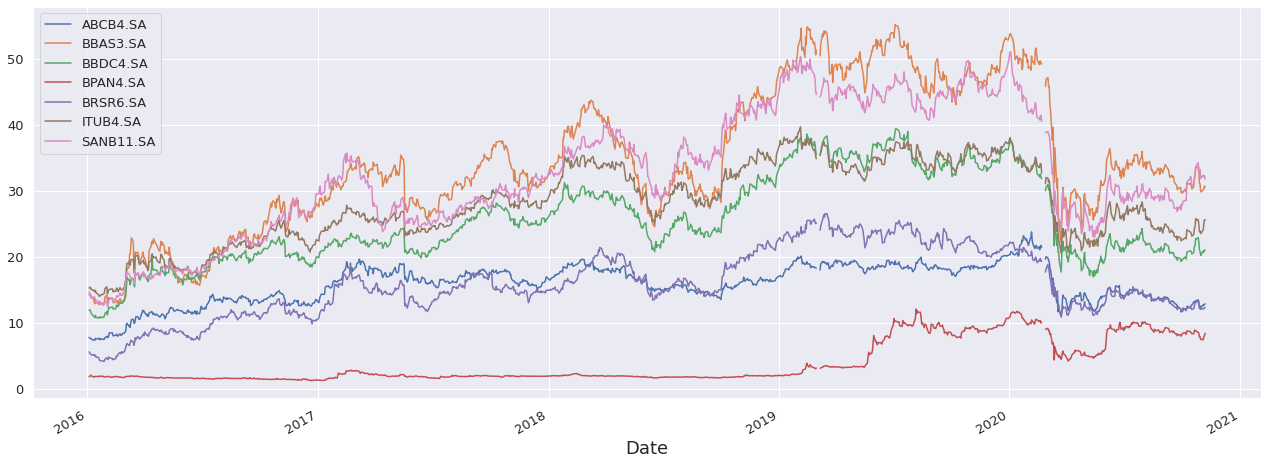

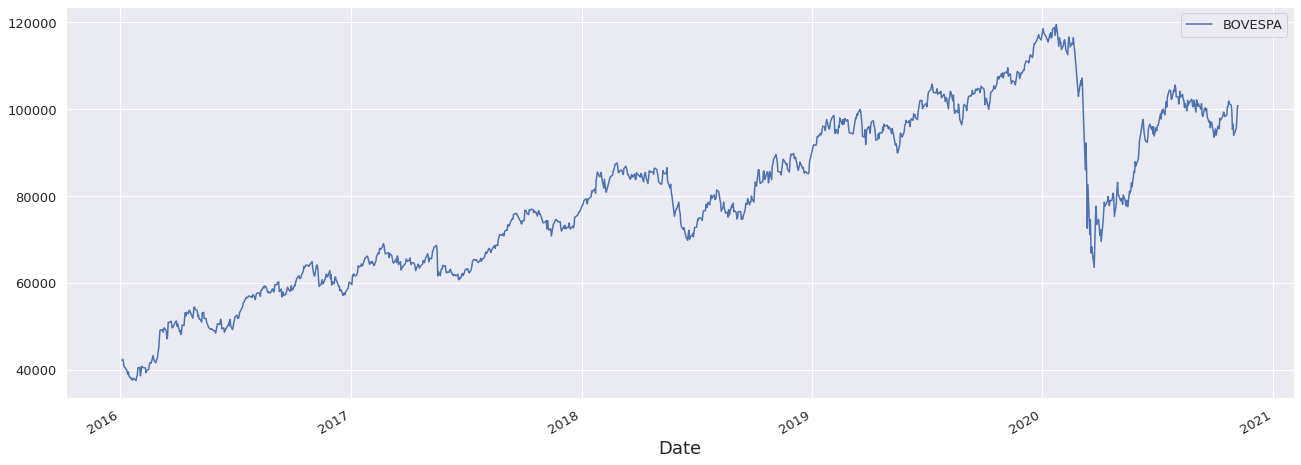

In [83]:
#Data in different scales, must be normalized to a properly comparison
stocks.plot(figsize = (22,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()
MP.plot(figsize = (22,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [84]:
stocks = pd.DataFrame(stocks)
stocks.head()

,ABCB4.SA,BBAS3.SA,BBDC4.SA,BPAN4.SA,BRSR6.SA,ITUB4.SA,SANB11.SA
Date,,,,,,,
2016-01-04,$7.76,$14.24,$11.90,$1.79,$5.57,$15.23,$14.65
2016-01-05,$7.63,$14.29,$11.93,$1.85,$5.42,$15.36,$14.43
2016-01-06,$7.59,$14.29,$11.76,$2.00,$5.26,$15.30,$14.10
2016-01-07,$7.57,$13.95,$11.52,$1.99,$5.10,$15.01,$13.71
2016-01-08,$7.46,$13.95,$11.29,$1.88,$5.10,$15.01,$13.71


In [85]:
stocks.columns = ["ABCB4", "BBAS3", "BBDC4", "BPAN4", "BRSR6", "ITUB4", "SANB11"]
stocks.head()

,ABCB4,BBAS3,BBDC4,BPAN4,BRSR6,ITUB4,SANB11
Date,,,,,,,
2016-01-04,$7.76,$14.24,$11.90,$1.79,$5.57,$15.23,$14.65
2016-01-05,$7.63,$14.29,$11.93,$1.85,$5.42,$15.36,$14.43
2016-01-06,$7.59,$14.29,$11.76,$2.00,$5.26,$15.30,$14.10
2016-01-07,$7.57,$13.95,$11.52,$1.99,$5.10,$15.01,$13.71
2016-01-08,$7.46,$13.95,$11.29,$1.88,$5.10,$15.01,$13.71


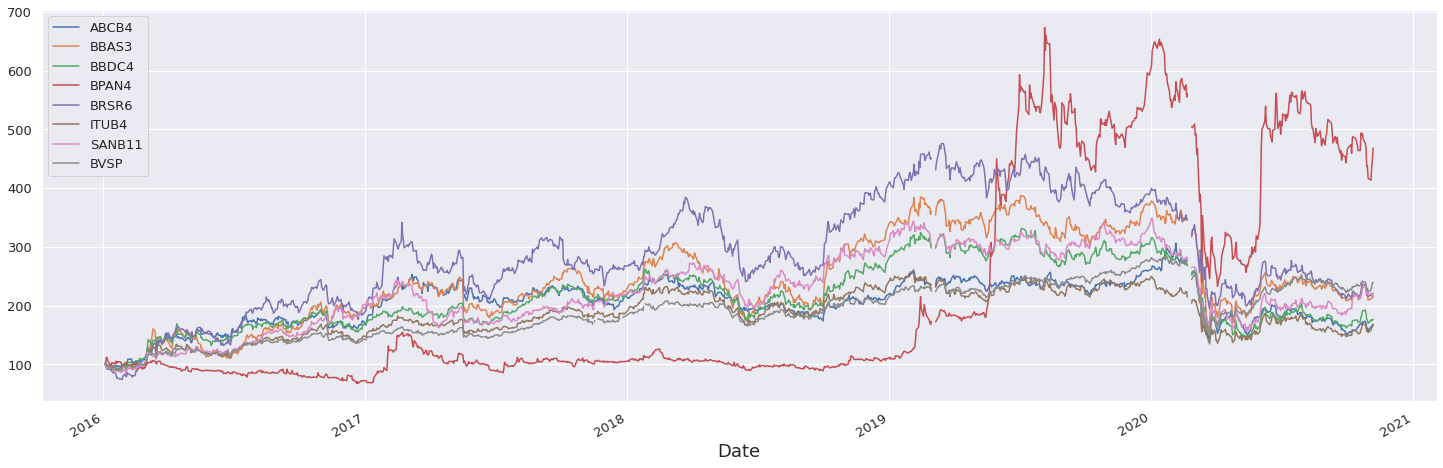

In [86]:
#Normalize & Join stocks with the MP BVSP
norm = stocks.div(stocks.iloc[0]).mul(100)
norm_MP = MP.div(MP.iloc[0]).mul(100)
norm["BVSP"] = norm_MP

#Plot
norm.plot(figsize = (25,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## DAILY RETURNS

In [87]:
# Join stocks and the MP to calculate daily returns
stocks["BOVESPA"] = MP

In [88]:
ret = stocks.pct_change().dropna()
ret.head()

,ABCB4,BBAS3,BBDC4,BPAN4,BRSR6,ITUB4,SANB11,BOVESPA
Date,,,,,,,,
2016-01-05,$-0.02,$0.00,$0.00,$0.03,$-0.03,$0.01,$-0.02,$0.01
2016-01-06,$-0.01,$0.00,$-0.01,$0.08,$-0.03,$-0.00,$-0.02,$-0.02
2016-01-07,$-0.00,$-0.02,$-0.02,$-0.00,$-0.03,$-0.02,$-0.03,$-0.03
2016-01-08,$-0.01,$0.00,$-0.02,$-0.06,$0.00,$0.00,$0.00,$-0.00
2016-01-11,$-0.02,$-0.03,$-0.03,$-0.04,$0.00,$-0.01,$0.00,$-0.02


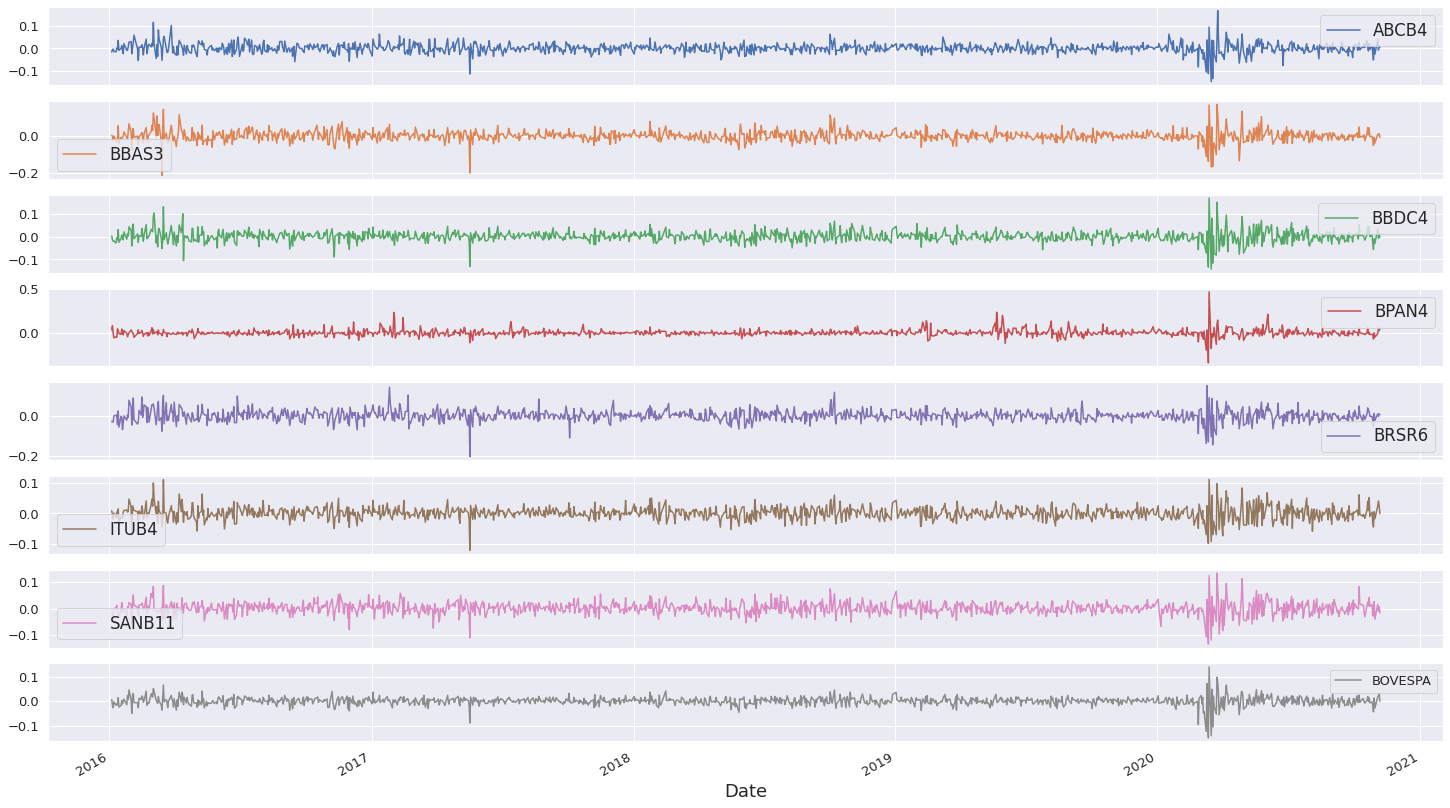

In [89]:
ret.plot(figsize = (25,15), fontsize = 13, subplots = True)
plt.legend(fontsize = 13)
plt.show()

## MEAN RETURNS

In [90]:
meanret = ret.mean(axis = 1).copy()
meanret = pd.DataFrame(meanret)
meanret.columns = ["Portfolio Mean Return"]

In [91]:
meanret.head()

,Portfolio Mean Return
Date,
2016-01-05,$-0.00
2016-01-06,$-0.00
2016-01-07,$-0.02
2016-01-08,$-0.01
2016-01-11,$-0.02


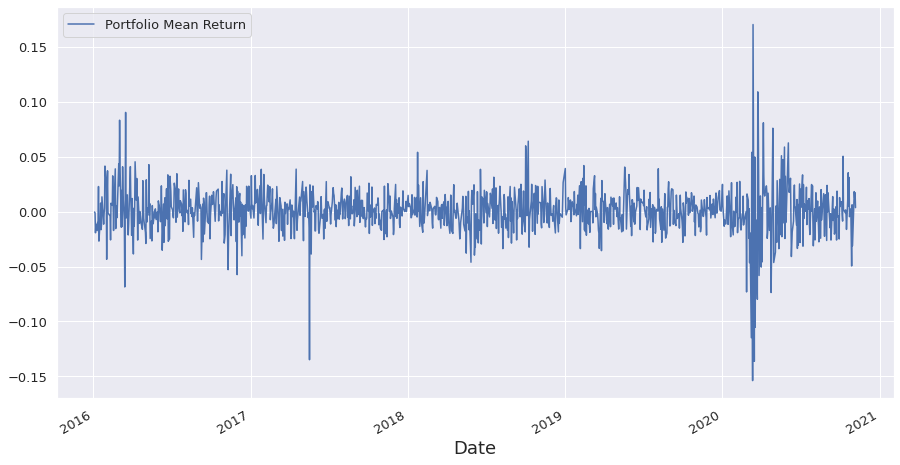

In [92]:
meanret.plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### A FUNCTION FOR ANNUALIZED RISK AND RETURN



In [93]:
def ann_risk_ret(return_df):
  summary = return_df.agg(["mean", "std"]).T
  summary.columns = ["Return", "Risk"]
  summary.Return = summary.Return * 252
  summary.Risk = summary.Risk * np.sqrt(252)
  return summary

In [94]:
summary = ann_risk_ret(ret)
summary

,Return,Risk
ABCB4,$0.17,$0.35
BBAS3,$0.27,$0.47
BBDC4,$0.19,$0.39
BPAN4,$0.51,$0.62
BRSR6,$0.27,$0.45
ITUB4,$0.16,$0.34
SANB11,$0.23,$0.38
BOVESPA,$0.22,$0.28


## THE SHARPE RATIO

## SIMULATIONS

Here we make 100000 simulations of portfolio options through the assets in hand to evaluate the optimal point of inflection.

SR = (PORTFOLIO RETURN - RISK FREE RETURN) / PORTFOLIO RISK

RISK FREE ASSET = RF
Valor de investimentos de renda fixa (SELIC, CDI, CDB, POUPANÇA), livres de risco.
1.   CDI RETURN = 0.0228 (2,28%a.a.) 2020-11-06
2.   CDI RISK = 0



In [99]:
rf_return = 0.0228
rf_risk = 0
rf = [rf_return, rf_risk]
rf

[0.0228, 0]

In [100]:
summary

,Return,Risk,SR
ABCB4,$0.17,$0.35,$0.41
BBAS3,$0.27,$0.47,$0.53
BBDC4,$0.19,$0.39,$0.44
BPAN4,$0.51,$0.62,$0.78
BRSR6,$0.27,$0.45,$0.54
ITUB4,$0.16,$0.34,$0.42
SANB11,$0.23,$0.38,$0.55
BOVESPA,$0.22,$0.28,$0.71


In [101]:
#add SR as a column
summary["SR"] = (summary["Return"].sub(rf[0])) / summary["Risk"]
summary

,Return,Risk,SR
ABCB4,$0.17,$0.35,$0.41
BBAS3,$0.27,$0.47,$0.53
BBDC4,$0.19,$0.39,$0.44
BPAN4,$0.51,$0.62,$0.78
BRSR6,$0.27,$0.45,$0.54
ITUB4,$0.16,$0.34,$0.42
SANB11,$0.23,$0.38,$0.55
BOVESPA,$0.22,$0.28,$0.71


In [102]:
tickers = ["ABCB4", "BBAS3", "BBDC4", "BPAN4", "BRSR6", "ITUB4", "SANB11", "BOVESPA"]
noassets = len(tickers)
noport = 100000
np.random.seed(123)

#Sum the weights of the portfolio and normalize to sum 1
matrix = np.random.random(noassets*noport).reshape(noport, noassets)

#Divide and store weights on a variable
weights = matrix / matrix.sum(axis = 1, keepdims = True)

#Calculate the daily average weighted return
port_ret = ret.dot(weights.T)
port_summary = ann_risk_ret(port_ret)

#Adicionar coluna Sharpe
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0])) / port_summary["Risk"]

port_summary.head()

,Return,Risk,Sharpe
0,$0.25,$0.32,$0.72
1,$0.28,$0.33,$0.78
2,$0.25,$0.33,$0.70
3,$0.23,$0.32,$0.64
4,$0.23,$0.33,$0.65


In [103]:
port_summary.describe()

,Return,Risk,Sharpe
count,"$100,000.00","$100,000.00","$100,000.00"
mean,$0.25,$0.33,$0.69
std,$0.02,$0.01,$0.06
min,$0.18,$0.29,$0.49
25%,$0.24,$0.33,$0.65
50%,$0.25,$0.33,$0.69
75%,$0.27,$0.34,$0.73
max,$0.39,$0.45,$0.85


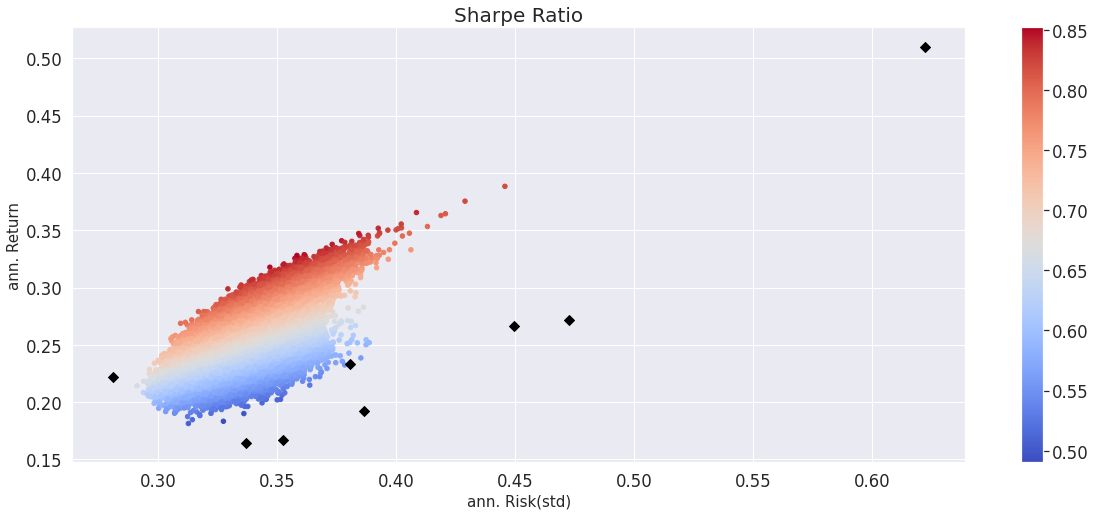

In [104]:
plt.figure(figsize = (20, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm")
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

### MAX SHARPE RATIO

In [105]:
port_summary = pd.DataFrame(port_summary)
port_summary

,Return,Risk,Sharpe
0,$0.25,$0.32,$0.72
1,$0.28,$0.33,$0.78
2,$0.25,$0.33,$0.70
3,$0.23,$0.32,$0.64
4,$0.23,$0.33,$0.65
...,...,...,...
99995,$0.28,$0.34,$0.75
99996,$0.24,$0.33,$0.67
99997,$0.30,$0.35,$0.80
99998,$0.25,$0.33,$0.68


In [106]:
# Index of max value for Sharpe Ratio
msr = port_summary.Sharpe.idxmax()
msr

91017

In [107]:
# Very best port_summary
msrp = port_summary.iloc[msr]
msrp

Return   $0.33
Risk     $0.36
Sharpe   $0.85
Name: 91017, dtype: float64

In [108]:
# Row with weights of the Max Sharpe Ratio Portfolio
msrp_weights = weights[msr, :]
msrp_weights

array([0.03338475, 0.07316289, 0.00772671, 0.34625095, 0.13619463,
       0.03045559, 0.04283122, 0.32999326])

In [109]:
opt_weights = pd.Series(index = stocks.columns,
                        data = msrp_weights)

In [110]:
#For this calculated "Max SR - MP" we create a new column for returns dataframe with dot method
ret["MP"] = ret.dot(opt_weights)
summary = ann_risk_ret(ret)
summary["Sharpe"] = (summary["Return"].sub(rf[0])) / summary["Risk"]
summary                  

,Return,Risk,Sharpe
ABCB4,$0.17,$0.35,$0.41
BBAS3,$0.27,$0.47,$0.53
BBDC4,$0.19,$0.39,$0.44
BPAN4,$0.51,$0.62,$0.78
BRSR6,$0.27,$0.45,$0.54
ITUB4,$0.16,$0.34,$0.42
SANB11,$0.23,$0.38,$0.55
BOVESPA,$0.22,$0.28,$0.71
MP,$0.33,$0.36,$0.85


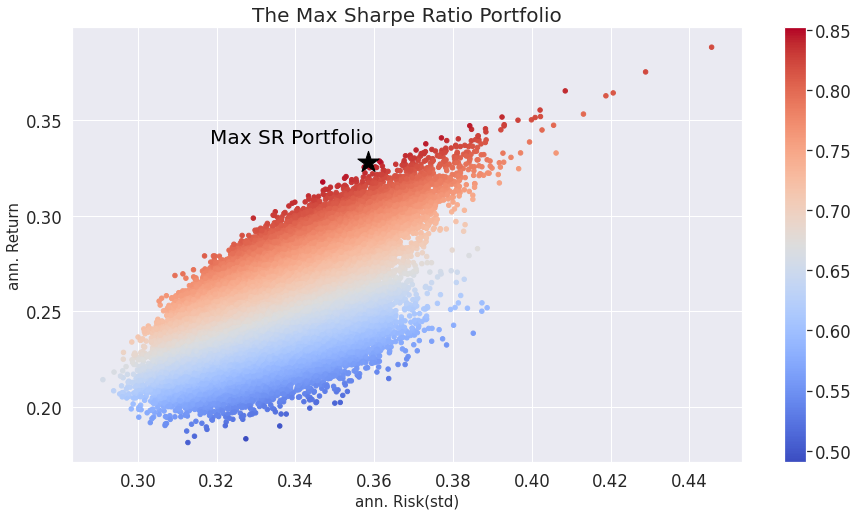

In [112]:
# Graphical result of Optimal SR

plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], 
            port_summary.loc[:, "Return"], 
            s= 20, 
            c = port_summary.loc[:, "Sharpe"], 
            cmap = "coolwarm")
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], 
            summary.loc["MP", "Return"],
            s= 500, 
            c = "black", 
            marker = "*")
plt.annotate("Max SR Portfolio", 
             xy=(summary.loc["MP", "Risk"]-0.04, 
                 summary.loc["MP", "Return"]+0.01), 
             size = 20, 
             color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

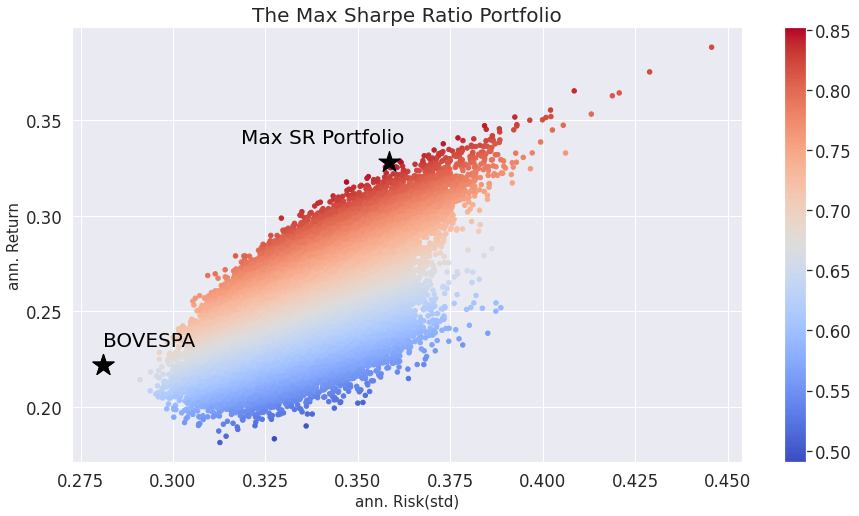

In [118]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], 
            port_summary.loc[:, "Return"], 
            s= 20, 
            c = port_summary.loc[:, "Sharpe"], 
            cmap = "coolwarm")
plt.colorbar()
plt.scatter(summary.loc["BOVESPA", "Risk"], 
            summary.loc["BOVESPA", "Return"],
            s= 500, 
            c = "black", 
            marker = "*")
plt.scatter(summary.loc["MP", "Risk"], 
            summary.loc["MP", "Return"],
            s= 500, 
            c = "black", 
            marker = "*")
plt.annotate("Max SR Portfolio", 
             xy=(summary.loc["MP", "Risk"]-0.04, 
                 summary.loc["MP", "Return"]+0.01), 
             size = 20, 
             color = "black")
plt.scatter(summary.loc["BOVESPA", "Risk"], 
            summary.loc["BOVESPA", "Return"],
            s= 500, 
            c = "black", 
            marker = "*")
plt.annotate("BOVESPA", 
             xy=(summary.loc["BOVESPA", "Risk"], 
                 summary.loc["BOVESPA", "Return"]+0.01), 
             size = 20, 
             color = "black")
plt.xlabel("ann. Risk(std)", 
           fontsize = 15)
plt.ylabel("ann. Return", 
           fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", 
          fontsize = 20)
plt.show()

CAPITAL MARKET LINE

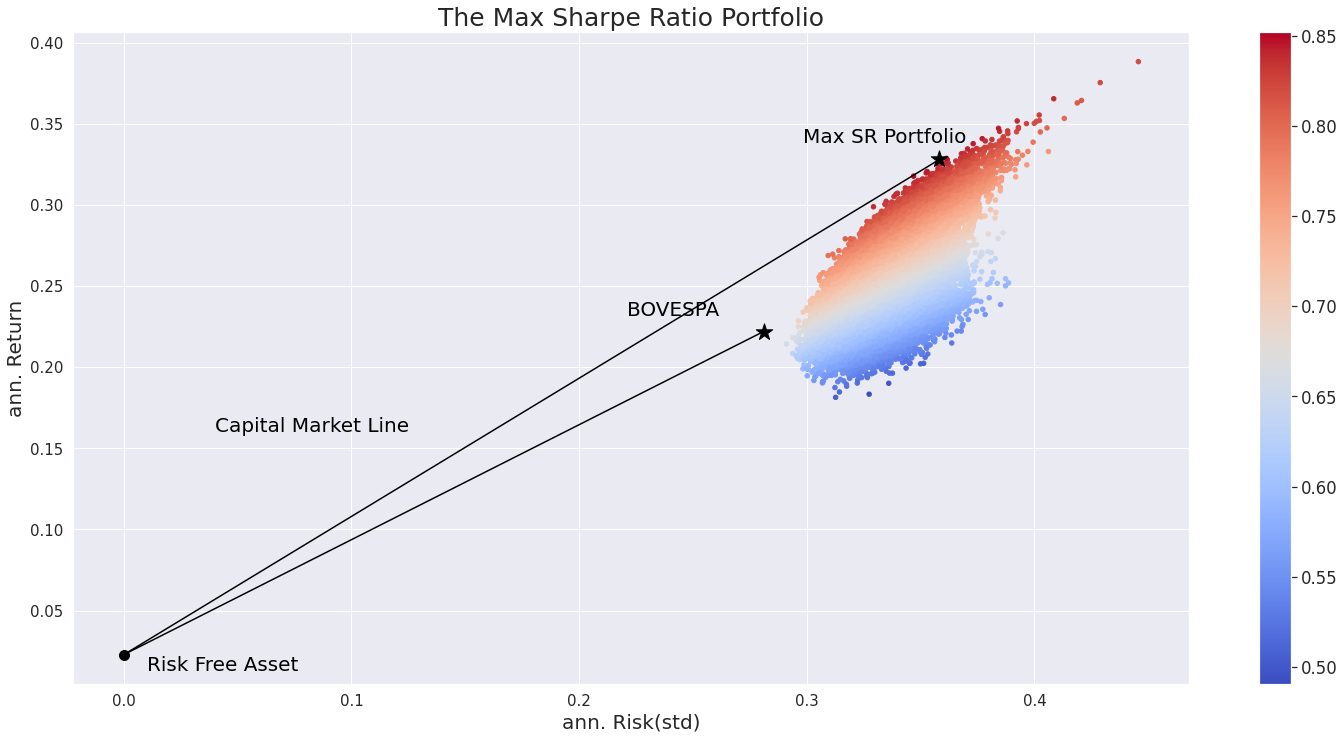

In [120]:
plt.figure(figsize = (25, 12))
plt.scatter(port_summary.loc[:, "Risk"], 
            port_summary.loc[:, "Return"], 
            s= 20, 
            c = port_summary.loc[:, "Sharpe"], 
            cmap = "coolwarm")
plt.colorbar()
plt.scatter(summary.loc["BOVESPA", "Risk"], 
            summary.loc["BOVESPA", "Return"],
            s= 300, 
            c = "black", 
            marker = "*")
plt.annotate("BOVESPA", 
             xy=(summary.loc["BOVESPA", "Risk"]-0.06, 
                 summary.loc["BOVESPA", "Return"]+0.01), 
             size = 20, 
             color = "black")
plt.scatter(summary.loc["MP", "Risk"], 
            summary.loc["MP", "Return"],
            s= 300, 
            c = "black", 
            marker = "*")
plt.annotate("Max SR Portfolio", 
             xy=(summary.loc["MP", "Risk"]-0.06, 
                 summary.loc["MP", "Return"]+0.01), 
             size = 20, 
             color = "black")
plt.scatter(rf[1], 
            rf[0], 
            s = 100, 
            marker = "o", 
            c = "black")
plt.annotate("Risk Free Asset", 
             xy = (rf[1] + 0.01, 
                   rf[0] - 0.01), 
             size = 20, 
             color = "black")
plt.xlabel("ann. Risk(std)", 
           fontsize = 20)
plt.ylabel("ann. Return", 
           fontsize = 20)
plt.tick_params(axis = "both", 
                labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", 
          fontsize = 25)
plt.plot([rf[1], summary.loc["BOVESPA", "Risk"]], 
         [rf[0],summary.loc["BOVESPA", "Return"]], 
         c = "black")
plt.plot([rf[1], summary.loc["MP", "Risk"]], 
         [rf[0],summary.loc["MP", "Return"]], 
         c = "black")
plt.annotate("Capital Market Line", 
             xy = (0.04, 0.16), 
             size = 20, 
             color = "black")
plt.show()

SYSTEMATIC & NON-SYSTEMATIC RISK

In [121]:
ret.corr()

,ABCB4,BBAS3,BBDC4,BPAN4,BRSR6,ITUB4,SANB11,BOVESPA,MP
ABCB4,$1.00,$0.65,$0.64,$0.36,$0.56,$0.61,$0.56,$0.67,$0.63
BBAS3,$0.65,$1.00,$0.81,$0.41,$0.67,$0.79,$0.73,$0.82,$0.75
BBDC4,$0.64,$0.81,$1.00,$0.39,$0.65,$0.87,$0.78,$0.85,$0.73
BPAN4,$0.36,$0.41,$0.39,$1.00,$0.34,$0.39,$0.38,$0.47,$0.86
BRSR6,$0.56,$0.67,$0.65,$0.34,$1.00,$0.63,$0.60,$0.68,$0.68
ITUB4,$0.61,$0.79,$0.87,$0.39,$0.63,$1.00,$0.80,$0.83,$0.73
SANB11,$0.56,$0.73,$0.78,$0.38,$0.60,$0.80,$1.00,$0.79,$0.70
BOVESPA,$0.67,$0.82,$0.85,$0.47,$0.68,$0.83,$0.79,$1.00,$0.82
MP,$0.63,$0.75,$0.73,$0.86,$0.68,$0.73,$0.70,$0.82,$1.00


In [122]:
# variance = teta²
summary["Total Risk_variance"] = np.power(summary.Risk,2)
summary

,Return,Risk,Sharpe,Total Risk_variance
ABCB4,$0.17,$0.35,$0.41,$0.12
BBAS3,$0.27,$0.47,$0.53,$0.22
BBDC4,$0.19,$0.39,$0.44,$0.15
BPAN4,$0.51,$0.62,$0.78,$0.39
BRSR6,$0.27,$0.45,$0.54,$0.20
ITUB4,$0.16,$0.34,$0.42,$0.11
SANB11,$0.23,$0.38,$0.55,$0.14
BOVESPA,$0.22,$0.28,$0.71,$0.08
MP,$0.33,$0.36,$0.85,$0.13


In [123]:
#Create covariance matrix for annualized returns
COV = ret.cov()*252
COV

,ABCB4,BBAS3,BBDC4,BPAN4,BRSR6,ITUB4,SANB11,BOVESPA,MP
ABCB4,$0.12,$0.11,$0.09,$0.08,$0.09,$0.07,$0.08,$0.07,$0.08
BBAS3,$0.11,$0.22,$0.15,$0.12,$0.14,$0.13,$0.13,$0.11,$0.13
BBDC4,$0.09,$0.15,$0.15,$0.09,$0.11,$0.11,$0.11,$0.09,$0.10
BPAN4,$0.08,$0.12,$0.09,$0.39,$0.09,$0.08,$0.09,$0.08,$0.19
BRSR6,$0.09,$0.14,$0.11,$0.09,$0.20,$0.09,$0.10,$0.09,$0.11
ITUB4,$0.07,$0.13,$0.11,$0.08,$0.09,$0.11,$0.10,$0.08,$0.09
SANB11,$0.08,$0.13,$0.11,$0.09,$0.10,$0.10,$0.14,$0.08,$0.09
BOVESPA,$0.07,$0.11,$0.09,$0.08,$0.09,$0.08,$0.08,$0.08,$0.08
MP,$0.08,$0.13,$0.10,$0.19,$0.11,$0.09,$0.09,$0.08,$0.13


## WEIGHTED AVERAGE COVARIANCE OF THE CONSTITUENTS

Using the COV["MP"](Market Portfolio) and the optimal weights. 

The covariance of the constituents of the portfolio are actually the SYSTEMATIC RISK of the constituents and therefore we can include to summary data frama the columns SYSTEMATIC and UNSYSTEMATIC RISKS in units.

The Systematic Risk is the whole economy market risk, that we can't diversify, as example the effects of the pandemy chronicaly affecting all economies simultaneously.

The Unsystematic Risk is the company specific risks, as example the Boeing situation with the 737 Max Recalls.

In [124]:
COV_opt = COV.iloc[:-1,-1].dot(opt_weights)
COV_opt

0.1283832578097085

In [125]:
summary["SystRisk_var"] = COV.iloc[:,-1]

In [126]:
summary["UnSystRisk_var"] = summary["Total Risk_variance"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,Total Risk_variance,SystRisk_var,UnSystRisk_var
ABCB4,$0.17,$0.35,$0.41,$0.12,$0.08,$0.04
BBAS3,$0.27,$0.47,$0.53,$0.22,$0.13,$0.10
BBDC4,$0.19,$0.39,$0.44,$0.15,$0.10,$0.05
BPAN4,$0.51,$0.62,$0.78,$0.39,$0.19,$0.19
BRSR6,$0.27,$0.45,$0.54,$0.20,$0.11,$0.09
ITUB4,$0.16,$0.34,$0.42,$0.11,$0.09,$0.03
SANB11,$0.23,$0.38,$0.55,$0.14,$0.09,$0.05
BOVESPA,$0.22,$0.28,$0.71,$0.08,$0.08,$-0.00
MP,$0.33,$0.36,$0.85,$0.13,$0.13,$0.00


## BETA FACTOR ANALYSIS -  CAPM AND THE SECURITY MARKET LINE

We can compare the SYSTEMATIC RISKS called BETA factor.

Each security should deliver return in accordance to its systematic risks.

In [127]:
#Normalize, in respect to variance of the market portfolio, the Systematic Risk, so MP = 1.
summary["beta"] = summary.SystRisk_var / summary.loc["BOVESPA", "SystRisk_var"]
summary

,Return,Risk,Sharpe,Total Risk_variance,SystRisk_var,UnSystRisk_var,beta
ABCB4,$0.17,$0.35,$0.41,$0.12,$0.08,$0.04,$0.96
BBAS3,$0.27,$0.47,$0.53,$0.22,$0.13,$0.10,$1.54
BBDC4,$0.19,$0.39,$0.44,$0.15,$0.10,$0.05,$1.22
BPAN4,$0.51,$0.62,$0.78,$0.39,$0.19,$0.19,$2.32
BRSR6,$0.27,$0.45,$0.54,$0.20,$0.11,$0.09,$1.33
ITUB4,$0.16,$0.34,$0.42,$0.11,$0.09,$0.03,$1.06
SANB11,$0.23,$0.38,$0.55,$0.14,$0.09,$0.05,$1.14
BOVESPA,$0.22,$0.28,$0.71,$0.08,$0.08,$-0.00,$1.00
MP,$0.33,$0.36,$0.85,$0.13,$0.13,$0.00,$1.55


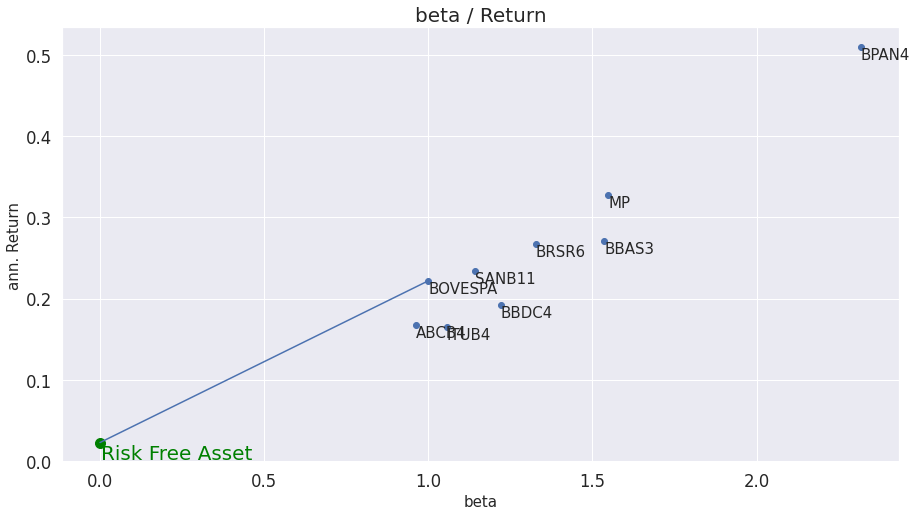

In [128]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["BOVESPA", "beta"]], [rf[0], summary.loc["BOVESPA", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

# CAPM

In comparison, the return column and the CAPM column, for the constituents that lies over the security market line it should be equal. But for that ones that are UNDER or OVER , the performance can be analysed.

The under of over performance of a stock is called ALPHA.

## BETA & ALPHA

Beta corresponds to the ability of market returns to permit forecasting stocks returns, so the alpha is shown as the error present in the metholodology.

In [70]:
summary["CAPM"] = rf[0] + (summary.loc["BOVESPA", "Return"] - rf[0]) * summary.beta
summary

,Return,Risk,Sharpe,Total Risk_variance,SystRisk_var,UnSystRisk_var,beta,CAPM
ABCB4,$0.17,$0.35,$0.37,$0.12,$0.08,$0.04,$0.96,$0.21
BBAS3,$0.27,$0.47,$0.50,$0.22,$0.13,$0.10,$1.54,$0.32
BBDC4,$0.19,$0.39,$0.40,$0.15,$0.10,$0.05,$1.22,$0.26
BPAN4,$0.51,$0.62,$0.76,$0.39,$0.19,$0.19,$2.32,$0.47
BRSR6,$0.27,$0.45,$0.51,$0.20,$0.11,$0.09,$1.33,$0.28
ITUB4,$0.16,$0.34,$0.38,$0.11,$0.09,$0.03,$1.06,$0.23
SANB11,$0.23,$0.38,$0.52,$0.14,$0.09,$0.05,$1.14,$0.25
BOVESPA,$0.22,$0.28,$0.66,$0.08,$0.08,$-0.00,$1.00,$0.22
MP,$0.33,$0.36,$0.81,$0.13,$0.13,$0.00,$1.55,$0.32


In [71]:
summary["alpha"] = summary.Return - summary.CAPM
summary

,Return,Risk,Sharpe,Total Risk_variance,SystRisk_var,UnSystRisk_var,beta,CAPM,alpha
ABCB4,$0.17,$0.35,$0.37,$0.12,$0.08,$0.04,$0.96,$0.21,$-0.05
BBAS3,$0.27,$0.47,$0.50,$0.22,$0.13,$0.10,$1.54,$0.32,$-0.05
BBDC4,$0.19,$0.39,$0.40,$0.15,$0.10,$0.05,$1.22,$0.26,$-0.07
BPAN4,$0.51,$0.62,$0.76,$0.39,$0.19,$0.19,$2.32,$0.47,$0.04
BRSR6,$0.27,$0.45,$0.51,$0.20,$0.11,$0.09,$1.33,$0.28,$-0.02
ITUB4,$0.16,$0.34,$0.38,$0.11,$0.09,$0.03,$1.06,$0.23,$-0.07
SANB11,$0.23,$0.38,$0.52,$0.14,$0.09,$0.05,$1.14,$0.25,$-0.01
BOVESPA,$0.22,$0.28,$0.66,$0.08,$0.08,$-0.00,$1.00,$0.22,$0.00
MP,$0.33,$0.36,$0.81,$0.13,$0.13,$0.00,$1.55,$0.32,$0.00


## LINEAR REGRESSION APPROACH

Linear Regressions permit the exploration of the fit on the data points of the database corresponding to the level of exposure, analysing the dispersion and angular coeficient is possible to infer about the psychology behind the movements of the market and Banking response.

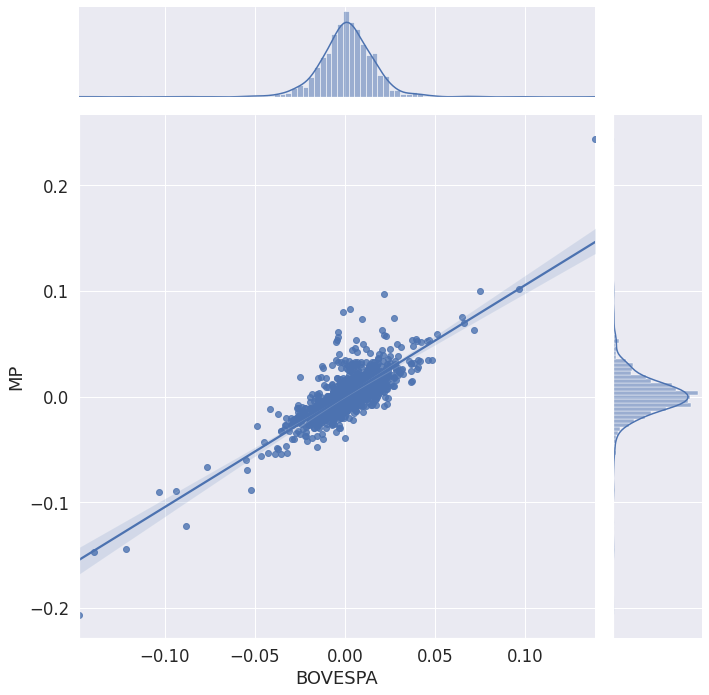

In [129]:
# BOVESPA AND BANKING PORTFOLIO
sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "MP",
              height = 10,
              kind = "reg")
plt.show()

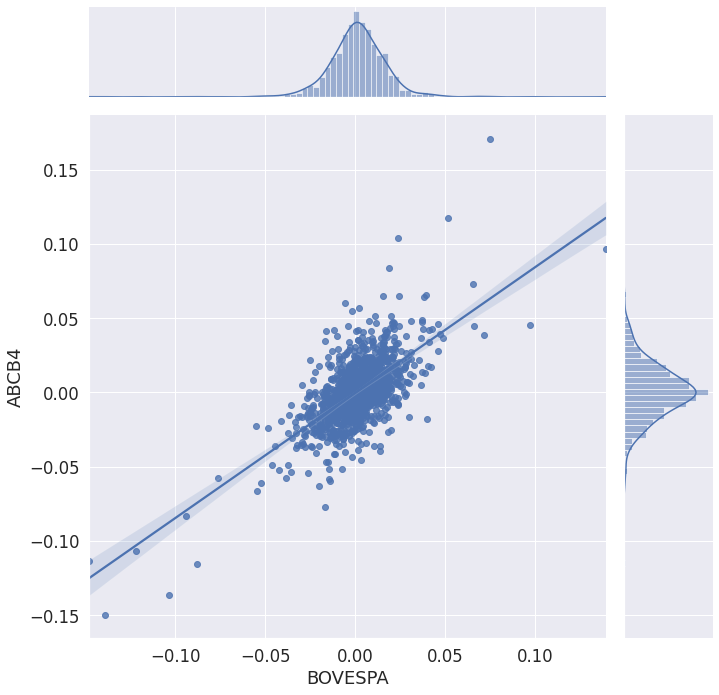

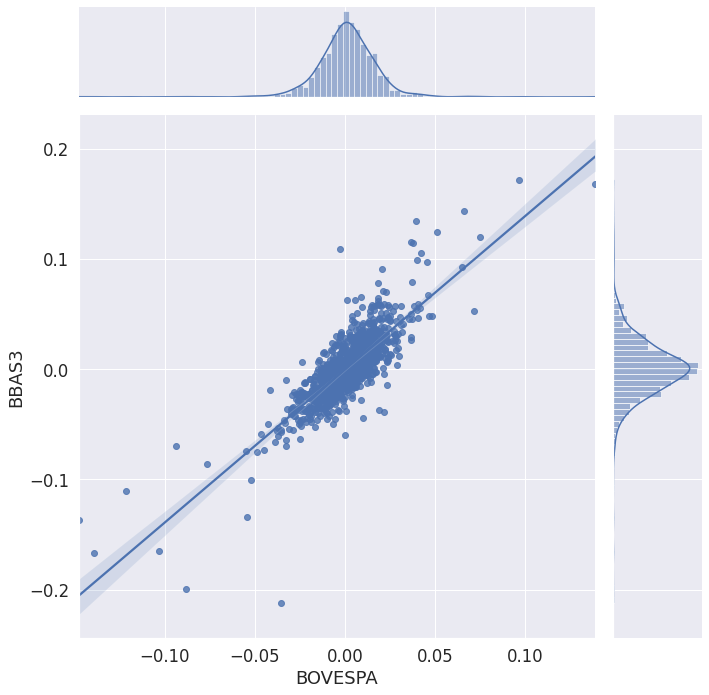

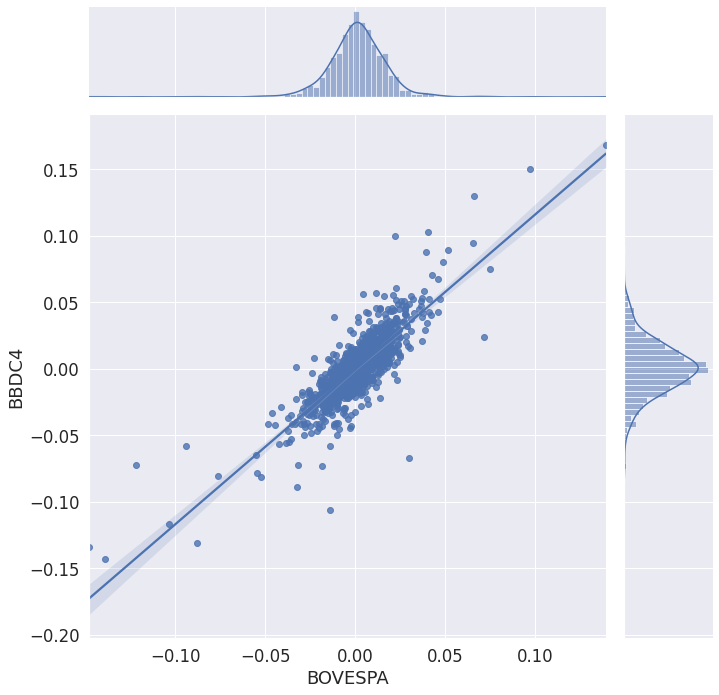

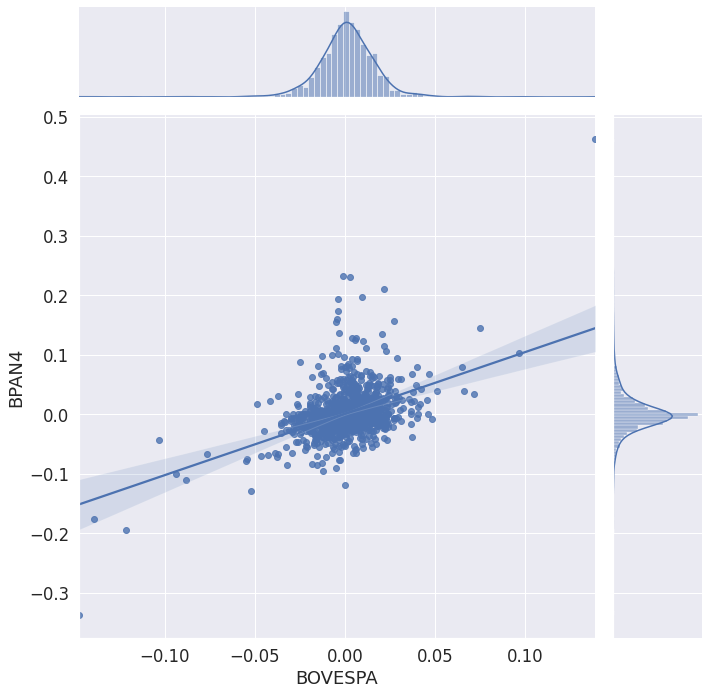

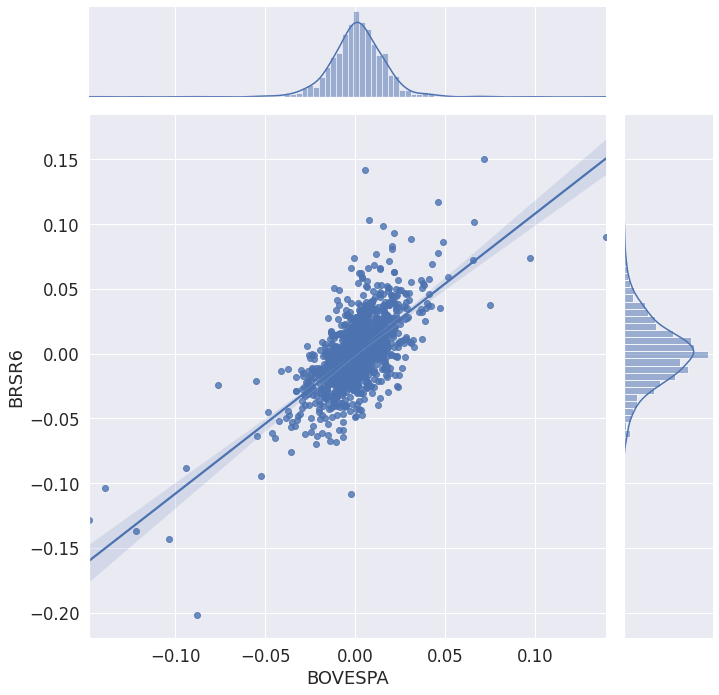

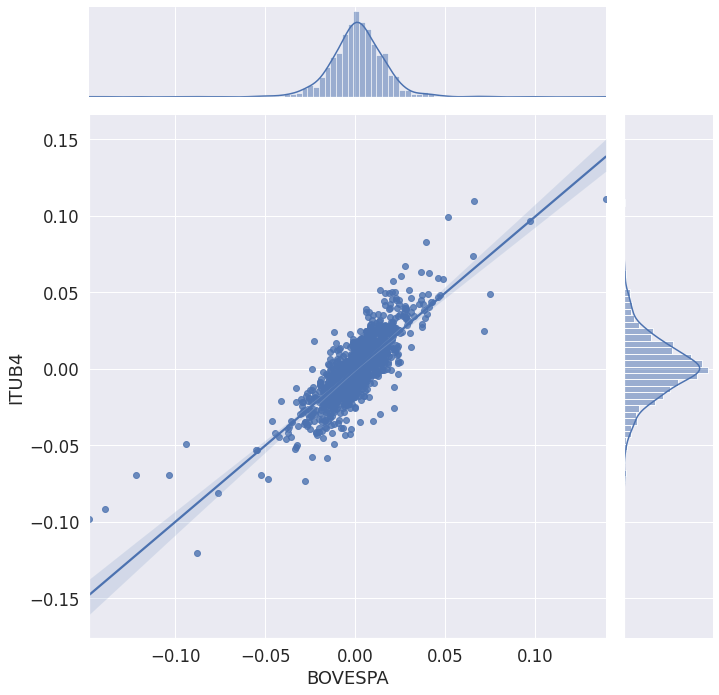

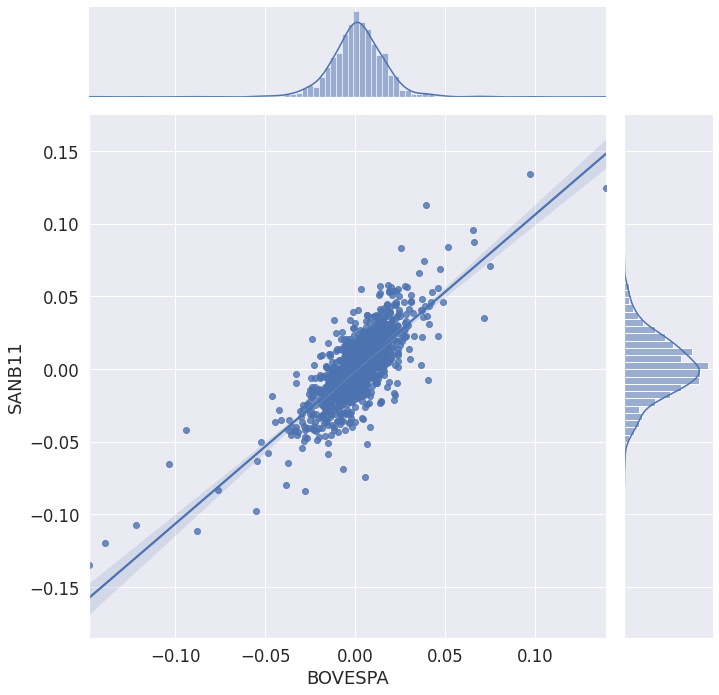

In [74]:
# BOVESPA AND SINGLE STOCKS

sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "ABCB4",
              height = 10,
              kind = "reg")
plt.show()
sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "BBAS3",
              height = 10,
              kind = "reg")
plt.show()
sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "BBDC4",
              height = 10,
              kind = "reg")
plt.show()
sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "BPAN4",
              height = 10,
              kind = "reg")
plt.show()
sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "BRSR6",
              height = 10,
              kind = "reg")
plt.show()
sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "ITUB4",
              height = 10,
              kind = "reg")
plt.show()
sns.set(font_scale = 1.5)
sns.jointplot(data = ret,
              x = "BOVESPA",
              y = "SANB11",
              height = 10,
              kind = "reg")
plt.show()

In [130]:
# If the Market Portfolio increase/decrease by 1%, than the returns of the a specific security get multiplied by beta (beta * unit) 
ABCB4_beta = np.polyfit(ret.BOVESPA, ret.ABCB4, 1)
ABCB4_beta  

array([ 8.45673835e-01, -8.05970145e-05])

In [131]:
BBAS3_beta = np.polyfit(ret.BOVESPA, ret.BBAS3, 1)
BBAS3_beta

array([ 1.38774915e+00, -1.45036454e-04])

In [133]:
BBDC4_beta = np.polyfit(ret.BOVESPA, ret.BBDC4, 1)
BBDC4_beta

array([ 1.16561972e+00, -2.61957571e-04])

In [134]:
ITAU4_beta = np.polyfit(ret.BOVESPA, ret.ITUB4, 1)
ITAU4_beta

array([ 9.97481424e-01, -2.24709084e-04])

In [135]:
SANB11_beta = np.polyfit(ret.BOVESPA, ret.SANB11, 1)
SANB11_beta

array([ 1.06435257e+00, -1.02842527e-05])

In [136]:
BPAN4_beta = np.polyfit(ret.BOVESPA, ret.BPAN4, 1)
BPAN4_beta

array([1.03278002, 0.00111306])

In [137]:
BRSR6_beta = np.polyfit(ret.BOVESPA, ret.BRSR6, 1)
BRSR6_beta

array([1.08250343e+00, 1.05111322e-04])